# Numerical Methods Final Project: Object Volume Determination through Picture Analysis

## Introduction

Welcome to our Numerical Methods Final Project, where we try to determine object volume through picture analysis using numerical methods. In this project, we aim to develop a computational approach to estimate the volume of three-dimensional objects based on their two-dimensional images. By leveraging various numerical techniques, we can estimate the volume of an object.

## Team Members

1. **Putu Arva Raysendriya Ersuputra** - 21/472606/PA/20312

2. **Antonius Teddy Kurniawan** - 21/472874/PA/20352

3. **Peter Johan Arkadhira Setiabudi** - 21/475025/PA/20510

4. **Henzel Theodore Putra** -21/475040/PA/20516 

### Import Necessary Library

In [93]:
from PIL import Image

### Define Necessary Functions

In [94]:
def grayscale(image):
    # Convert the image to grayscale
    return image.convert('L')

In [95]:
def bilinear_interpolation(image, x, y):
    width, height = image.size

    if x < 0 or x >= width or y < 0 or y >= height:
        return 0

    x1, y1 = int(x), int(y)
    x2, y2 = x1 + 1, y1 + 1

    p11 = image.getpixel((x1, y1))
    p12 = image.getpixel((x1, y2))
    p21 = image.getpixel((x2, y1))
    p22 = image.getpixel((x2, y2))

    value = (p11 * (x2 - x) * (y2 - y) +
             p21 * (x - x1) * (y2 - y) +
             p12 * (x2 - x) * (y - y1) +
             p22 * (x - x1) * (y - y1))

    return value

In [96]:
def central_difference(image):
    width, height = image.size

    # Create an empty output image with RGB mode
    output = Image.new('RGB', (width, height))

    # Compute the maximum gradient magnitude for scaling
    max_magnitude = 0.0
    for x in range(1, width - 2):
        for y in range(1, height - 2):
            sub_x = x + 0.5
            sub_y = y + 0.5
            dx = bilinear_interpolation(image, sub_x + 1, sub_y) - bilinear_interpolation(image, sub_x - 1, sub_y)
            dy = bilinear_interpolation(image, sub_x, sub_y + 1) - bilinear_interpolation(image, sub_x, sub_y - 1)
            magnitude = abs((dx * 2 + dy * 2) ** 0.5)
            if magnitude > max_magnitude:
                max_magnitude = magnitude

    # Apply central difference to compute the gradients and set pixel values in the output image
    for x in range(1, width - 2):
        for y in range(1, height - 2):
            sub_x = x + 0.5
            sub_y = y + 0.5
            dx = bilinear_interpolation(image, sub_x + 1, sub_y) - bilinear_interpolation(image, sub_x - 1, sub_y)
            dy = bilinear_interpolation(image, sub_x, sub_y + 1) - bilinear_interpolation(image, sub_x, sub_y - 1)
            magnitude = abs((dx * 2 + dy * 2) ** 0.5)

            # Scale the gradient magnitude to cover the full range of the color channel
            intensity = int((magnitude / max_magnitude) * 255)

            # Set the pixel value in the output image with the enhanced color
            output.putpixel((x, y), (intensity, intensity, intensity))

    return output



#### Load the image

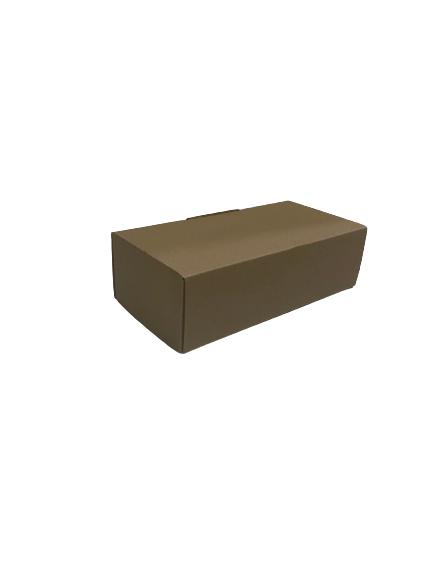

In [97]:
image = Image.open('./karduspijo.jpg')
image

#### Convert the image to grayscale

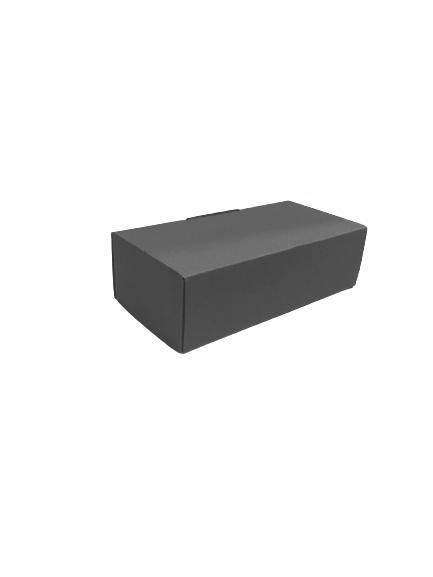

In [98]:
grayscale_image = grayscale(image)
grayscale_image

#### Perform edge detection using central difference with interpolation

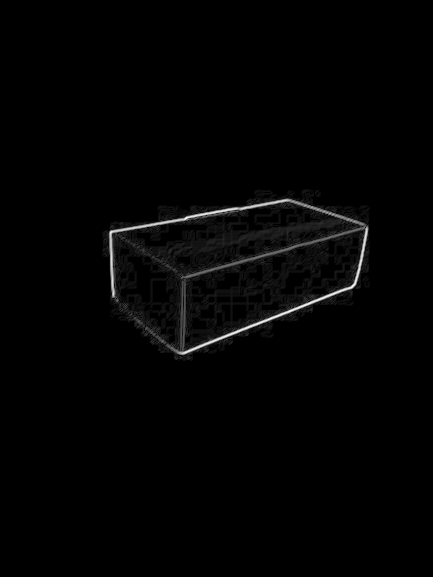

In [99]:
edges = central_difference(grayscale_image)
edges

#### Edges Modification by Pixel Edit

In [100]:
print(edges.width)

433


#### Calculate the volume based on the number of edge pixels (Not Working Yet)


In [101]:
def estimate_volume_voxel(edges, voxel_size):
    volume = 0
    width, height = edges.size

    for x in range(width):
        for y in range(height):
            r, g, b = edges.getpixel((x, y))
            if r > 0:  # Assuming red channel represents the edge
                volume += voxel_size ** 3

    return volume

def estimate_volume_integration(edges, bounds, num_intervals):
    volume = 0.0
    num_samples = num_intervals + 1
    interval_size = (bounds[1] - bounds[0]) / num_intervals

    for i in range(num_samples):
        x = bounds[0] + i * interval_size
        volume += simpson_integration(edges, x, interval_size)

    return volume

def simpson_integration(edges, x, interval_size):
    f_x0 = calculate_edge_value(edges, x)
    f_x1 = calculate_edge_value(edges, x + interval_size / 2)
    f_x2 = calculate_edge_value(edges, x + interval_size)

    area = (interval_size / 6) * (f_x0 + 4 * f_x1 + f_x2)
    return area

def calculate_edge_value(edges, x):
    width, height = edges.size
    x = int(x * (width - 1))  # Scale x-coordinate to image width

    if x < 0 or x >= width:
        return 0

    r, _, _ = edges.getpixel((x, 0))
    return r

# Example usage with voxel-based volume estimation
voxel_size = 1.0  # Size of each voxel (cubic unit)
volume_voxel = estimate_volume_voxel(edges, voxel_size)
print("Estimated Volume using Voxels:", volume_voxel)

# Example usage with integration-based volume estimation
bounds = [0.0, 1.0]  # Bounds of integration
num_intervals = 100  # Number of intervals for Simpson's rule
volume_integration = estimate_volume_integration(edges, bounds, num_intervals)
print("Estimated Volume using Integration:", volume_integration)

Estimated Volume using Voxels: 24565.0
Estimated Volume using Integration: 0.0


**Warning**

To accurately estimate the volume of the object we need to consider these variables namly the bounds and num_intervals

The bounds of integration and the number of intervals are problem-specific parameters that need to be determined based on the characteristics of the object or region you are working with and the desired accuracy of the volume estimation.

Here's a general guideline on how you can determine these values:

Bounds of Integration: The bounds of integration should cover the region of interest that you want to calculate the volume for. If you have prior knowledge about the object or region, you can use that information to determine the appropriate bounds. For example, if you know that the object extends from 0 to 1 in the x-direction, you can set the bounds as [0.0, 1.0]. If you don't have prior knowledge, you may need to analyze the data or consult domain experts to determine suitable bounds.

Number of Intervals: The number of intervals determines the level of granularity in the numerical integration. Generally, a higher number of intervals will provide a more accurate estimation but may require more computational resources. The choice of the number of intervals depends on the complexity of the object, the available computational resources, and the desired accuracy. As a starting point, you can use a relatively small number of intervals (e.g., 100) and then adjust it based on the desired accuracy and computational constraints.

It's important to note that determining the optimal values for bounds and the number of intervals may involve some trial and error, as it depends on the specific characteristics of the object or region and the accuracy requirements of your application. Experimenting with different values and assessing the convergence of the volume estimation can help you refine these parameters.

**Happy Experimenting Fellows**